In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import warnings

In [263]:
bandra = pd.read_excel('C:/Users/ANSUMAN/Documents/AQI-Analysis-of-Indian-Cities-Using-Machine-Learning-main/AQI-Analysis-of-Indian-Cities-Using-Machine-Learning-main/Sitewise_original_data/Bandra.xlsx')    # reads the bandra file
bandra.head()

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,AT,AQI,AQI_Standard
0,2019-05-31,11.83,51.33,11.17,13.96,1.46,32.15,0,19.0,Good
1,2019-06-01,11.83,46.70,14.09,16.06,1.59,24.38,0,23.0,Good
2,2019-06-02,12.71,45.52,13.68,16.39,1.60,24.95,0,23.0,Good
3,2019-06-03,16.68,48.91,13.45,16.98,1.59,24.88,0,22.0,Good
4,2019-06-04,14.62,46.22,11.49,18.54,1.60,24.76,0,19.0,Good


In [264]:
bandra['Date'] = pd.to_datetime(bandra['Date'], format="%Y-%m-%d") # converts the date values to proper date format from string for plotting purposes
bandra["month"] = bandra["Date"].dt.month
bandra["week"] = bandra["Date"].dt.strftime('%V').astype('int64')
bandra["week_day"] = bandra["Date"].dt.weekday
bandra.head()

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,AT,AQI,AQI_Standard,month,week,week_day
0,2019-05-31,11.83,51.33,11.17,13.96,1.46,32.15,0,19.0,Good,5,22,4
1,2019-06-01,11.83,46.70,14.09,16.06,1.59,24.38,0,23.0,Good,6,22,5
2,2019-06-02,12.71,45.52,13.68,16.39,1.60,24.95,0,23.0,Good,6,22,6
3,2019-06-03,16.68,48.91,13.45,16.98,1.59,24.88,0,22.0,Good,6,23,0
4,2019-06-04,14.62,46.22,11.49,18.54,1.60,24.76,0,19.0,Good,6,23,1


In [265]:
bandra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1637 non-null   datetime64[ns]
 1   PM2.5         1637 non-null   float64       
 2   PM10          1637 non-null   float64       
 3   NO2           1637 non-null   float64       
 4   SO2           1637 non-null   float64       
 5   CO            1637 non-null   float64       
 6   Ozone         1637 non-null   float64       
 7   AT            1637 non-null   int64         
 8   AQI           1637 non-null   float64       
 9   AQI_Standard  1637 non-null   object        
 10  month         1637 non-null   int32         
 11  week          1637 non-null   int64         
 12  week_day      1637 non-null   int32         
dtypes: datetime64[ns](1), float64(7), int32(2), int64(2), object(1)
memory usage: 153.6+ KB


## Support Vector Regression

In [266]:
model_svr = SVR(kernel = 'rbf', C=100,  epsilon=0.1)

### PM 2.5

In [267]:
data_pm25 = pd.DataFrame()
data_pm25["month"] = bandra["month"]
data_pm25["week"] = bandra["week"]
data_pm25["week_day"] = bandra["week_day"]
data_pm25["PM2.5"] = bandra["PM2.5"]
cols = data_pm25.columns
data_pm25.head()

,month,week,week_day,PM2.5
0,5,22,4,11.83
1,6,22,5,11.83
2,6,22,6,12.71
3,6,23,0,16.68
4,6,23,1,14.62


In [268]:
# shuffling the data set
data_pm25 = shuffle(data_pm25, random_state=1).reset_index(drop=True)
data_pm25.head()

,month,week,week_day,PM2.5
0,10,41,4,30.315059
1,11,45,2,30.315059
2,9,38,3,22.260000
3,7,28,4,7.780000
4,7,30,2,8.700000


In [269]:
duplicate_pm25 = data_pm25.copy()

In [270]:
#normalizing the dataset
data_pm25 = preprocessing.normalize(data_pm25,norm='l2')
data_pm25 = pd.DataFrame(data_pm25, columns=cols)

In [271]:
X_pm25 = data_pm25.drop('PM2.5', axis=1) #data basically refere to the values in the independent columns
y_pm25 = data_pm25.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

In [273]:
bandra_pm25_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [274]:
predictions_pm25 = bandra_pm25_svr.predict(X_test)

In [275]:
r2 = r2_score(y_test, predictions_pm25)
print('r2 score for  model is', r2)

r2 score for  model is 0.9318934181100078


In [276]:
#RSME - Root Mean Square Error
predictions_pm25 = predictions_pm25.reshape(y_test.shape[0],1)
np.sqrt(((predictions_pm25 - y_test)**2).mean())

PM2.5    0.060366
dtype: float64

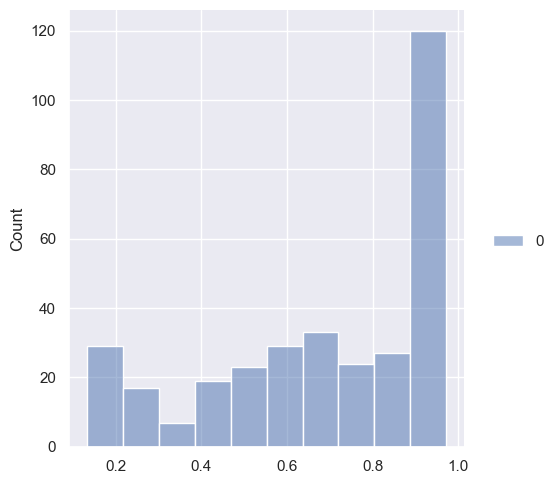

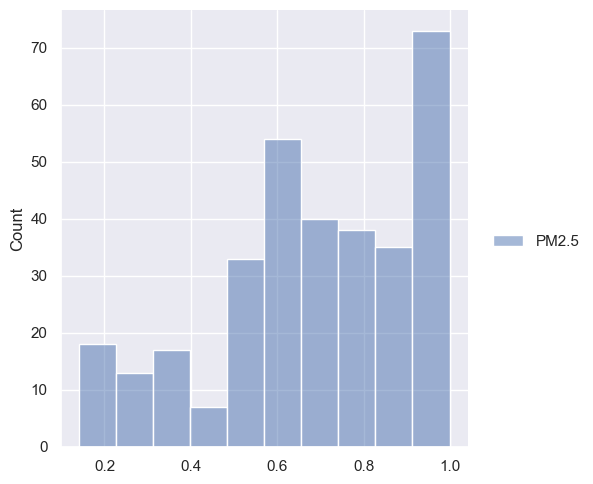

In [277]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm25)
sns.displot(data = y_test)

<Axes: ylabel='Density'>

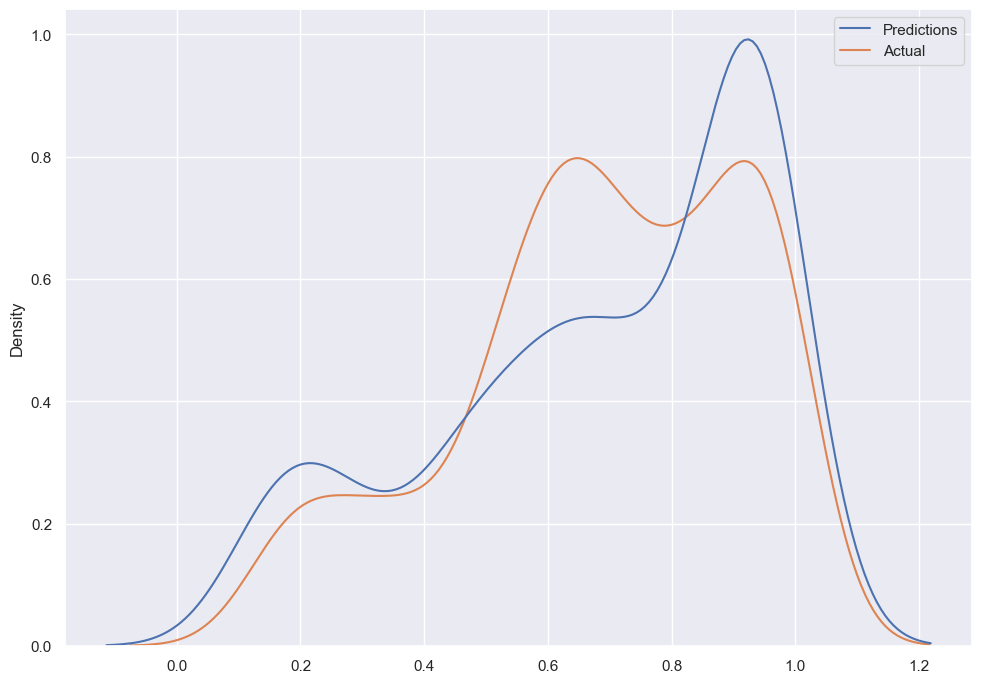

In [278]:
results = pd.DataFrame(predictions_pm25, columns = ['Predictions'])
results["Actual"] = list(y_test["PM2.5"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### PM10

In [279]:
data_pm10 = pd.DataFrame()
data_pm10["month"] = bandra["month"]
data_pm10["week"] = bandra["week"]
data_pm10["week_day"] = bandra["week_day"]
data_pm10["PM10"] = bandra["PM10"]
cols = data_pm10.columns
data_pm10.head()

,month,week,week_day,PM10
0,5,22,4,51.33
1,6,22,5,46.70
2,6,22,6,45.52
3,6,23,0,48.91
4,6,23,1,46.22


In [280]:
# shuffling the data set
data_pm10 = shuffle(data_pm10, random_state=1).reset_index(drop=True)
data_pm10.head()

,month,week,week_day,PM10
0,10,41,4,80.391622
1,11,45,2,80.391622
2,9,38,3,68.640000
3,7,28,4,32.070000
4,7,30,2,32.960000


In [281]:
duplicate_pm10 = data_pm10.copy()

In [282]:
#normalizing the dataset
data_pm10 = preprocessing.normalize(data_pm10,norm='l2')
data_pm10 = pd.DataFrame(data_pm10, columns=cols)

In [283]:
X_pm10 = data_pm10.drop('PM10', axis=1) #data basically refere to the values in the independent columns
y_pm10 = data_pm10.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)

In [285]:
bandra_pm10_model_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [286]:
predictions_pm10 = bandra_pm10_model_svr.predict(X_test)

In [287]:
r2 = r2_score(y_test, predictions_pm10)
print('r2 score for   model is', r2)

r2 score for   model is -0.2194116162684112


In [288]:
predictions_pm10.shape

(328,)

In [289]:
#RSME - Root Mean Square Error
predictions4 = predictions_pm10.reshape(y_test.shape[0],1)
np.sqrt(((predictions4 - y_test)**2).mean())

PM10    0.093728
dtype: float64

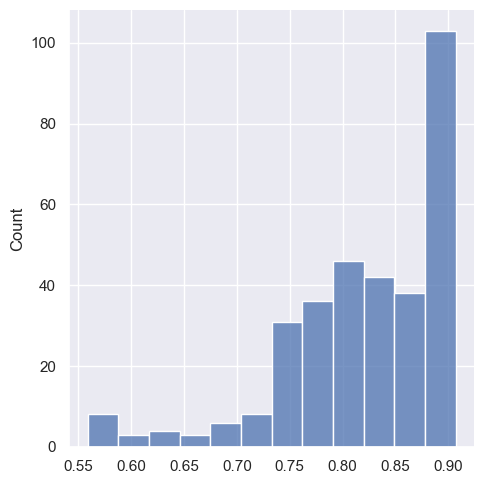

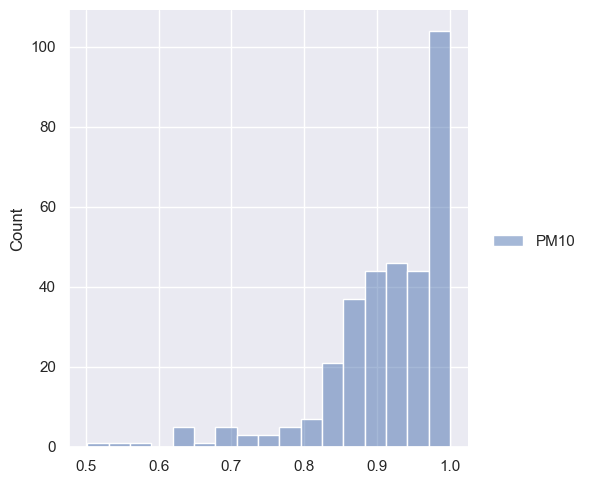

In [290]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm10)
sns.displot(data = y_test)

<Axes: ylabel='Density'>

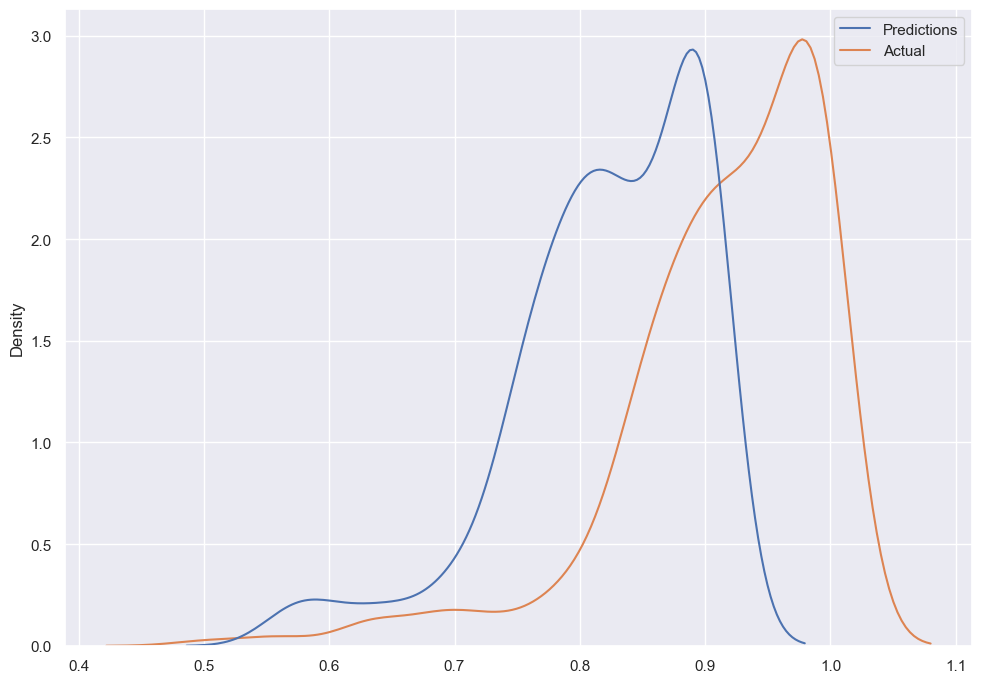

In [291]:
results = pd.DataFrame(predictions_pm10, columns = ['Predictions'])
results["Actual"] = list(y_test["PM10"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NO2

In [292]:
data_no2 = pd.DataFrame()
data_no2["month"] = bandra["month"]
data_no2["week"] = bandra["week"]
data_no2["week_day"] = bandra["week_day"]
data_no2["NO2"] = bandra["NO2"]
cols = data_no2.columns
data_no2.head()

,month,week,week_day,NO2
0,5,22,4,11.17
1,6,22,5,14.09
2,6,22,6,13.68
3,6,23,0,13.45
4,6,23,1,11.49


In [293]:
# shuffling the data set
data_no2=shuffle(data_no2, random_state=1).reset_index(drop=True)
data_no2.head()

,month,week,week_day,NO2
0,10,41,4,19.601837
1,11,45,2,19.601837
2,9,38,3,30.550000
3,7,28,4,1.200000
4,7,30,2,1.220000


In [294]:
duplicate_no2 = data_no2.copy()

In [295]:
#normalizing the dataset
data_no2 = preprocessing.normalize(data_no2,norm='l2')
data_no2 = pd.DataFrame(data_no2, columns=cols)

In [296]:
X_no2 = data_no2.drop('NO2', axis=1) #data basically refere to the values in the independent columns
y_no2 = data_no2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X_no2, y_no2, test_size=0.2, random_state=42)

In [298]:
bandra_no2_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [299]:
predictions_no2 = bandra_no2_svr.predict(X_test)

In [300]:
r2 = r2_score(y_test, predictions_no2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9455893179250381


In [301]:
predictions_no2.shape

(328,)

In [302]:
#RSME - Root Mean Square Error
predictions5 = predictions_no2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

NO2    0.071339
dtype: float64

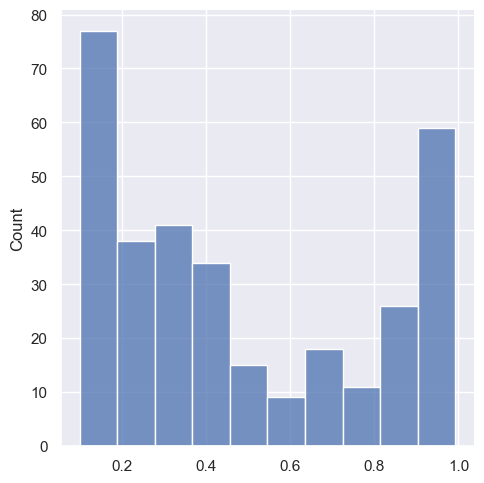

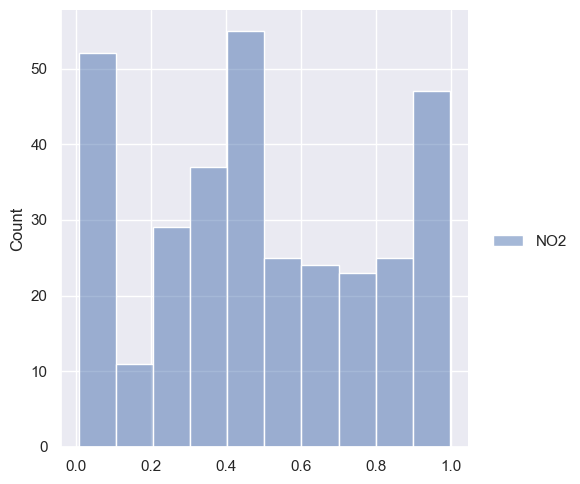

In [303]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_no2)
sns.displot(data = y_test)

<Axes: ylabel='Density'>

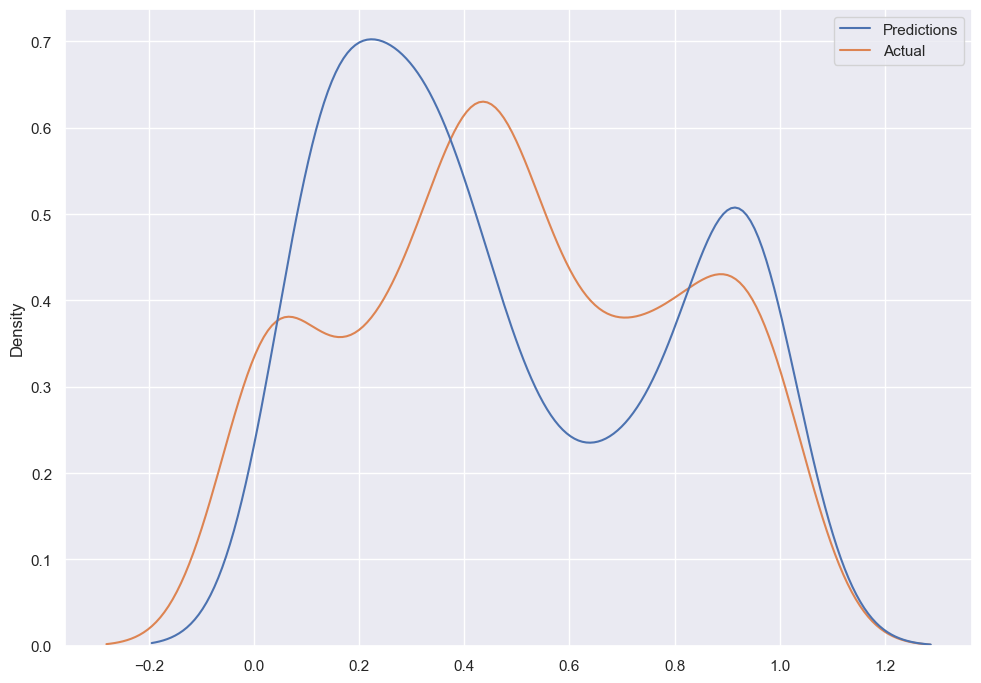

In [304]:
results = pd.DataFrame(predictions_no2, columns = ['Predictions'])
results["Actual"] = list(y_test["NO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### SO2

In [305]:
data_so2 = pd.DataFrame()
data_so2["month"] = bandra["month"]
data_so2["week"] = bandra["week"]
data_so2["week_day"] = bandra["week_day"]
data_so2["SO2"] = bandra["SO2"]
cols = data_so2.columns
data_so2.head()

,month,week,week_day,SO2
0,5,22,4,13.96
1,6,22,5,16.06
2,6,22,6,16.39
3,6,23,0,16.98
4,6,23,1,18.54


In [306]:
# shuffling the data set
data_so2 = shuffle(data_so2, random_state=1).reset_index(drop=True)
data_so2.head()

,month,week,week_day,SO2
0,10,41,4,21.986487
1,11,45,2,21.986487
2,9,38,3,14.190000
3,7,28,4,0.030000
4,7,30,2,0.040000


In [307]:
duplicate_so2 = data_so2.copy()

In [308]:
#normalizing the dataset
data_so2 = preprocessing.normalize(data_so2,norm='l2')
data_so2 = pd.DataFrame(data_so2, columns=cols)

In [309]:
X_so2 = data_so2.drop('SO2', axis=1) #data basically refere to the values in the independent columns
y_so2 = data_so2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X_so2, y_so2, test_size=0.2, random_state=42)

In [311]:
bandra_so2_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [312]:
predictions_so2 = bandra_so2_svr.predict(X_test)

In [313]:
r2 = r2_score(y_test, predictions_so2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9247016966521363


In [314]:
predictions_so2.shape

(328,)

In [315]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

SO2    0.072421
dtype: float64

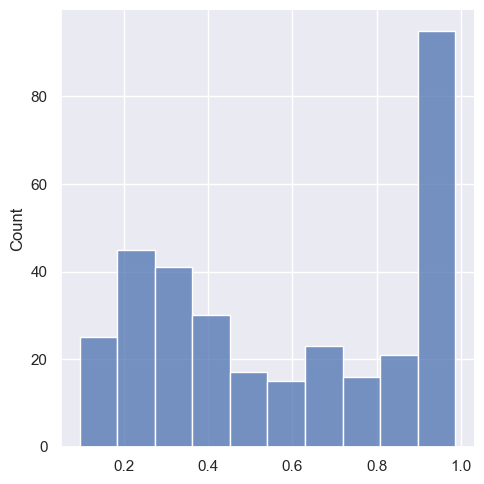

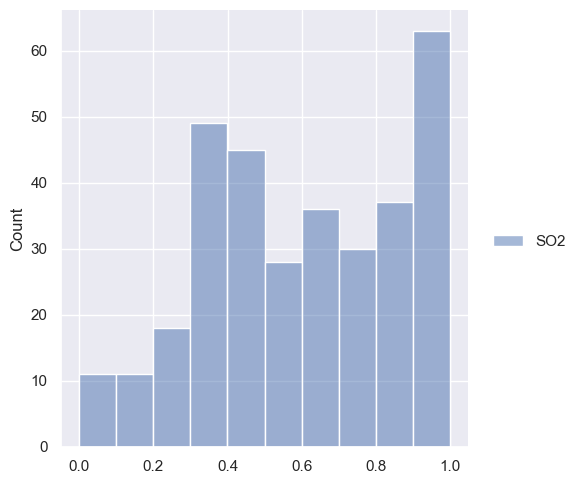

In [316]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_so2)
sns.displot(data = y_test)

<Axes: ylabel='Density'>

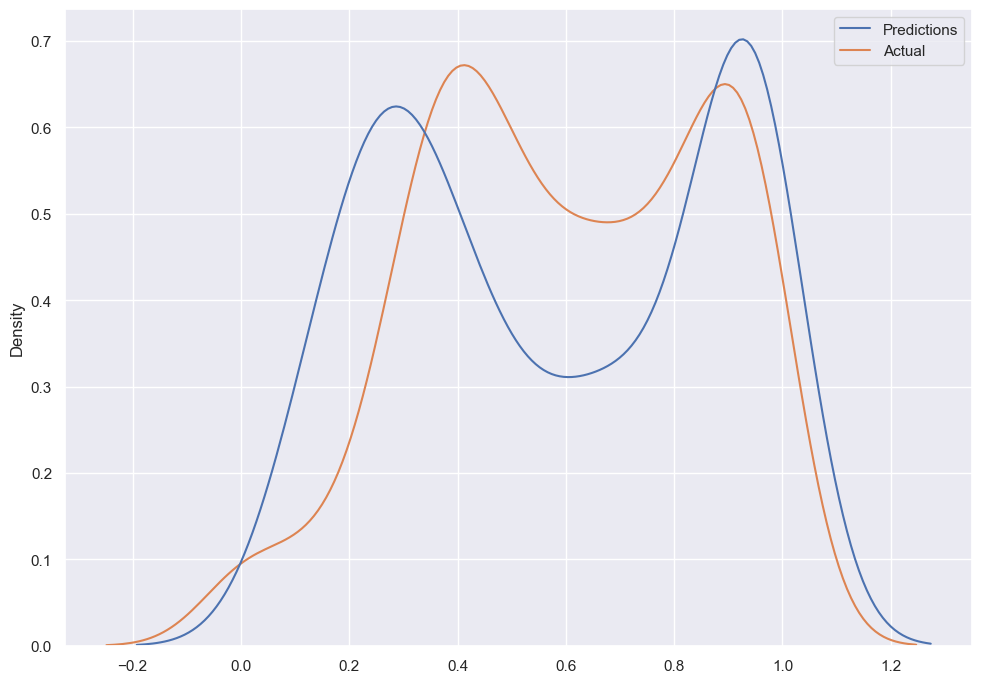

In [317]:
results = pd.DataFrame(predictions_so2, columns = ['Predictions'])
results["Actual"] = list(y_test["SO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### CO

In [318]:
data_co = pd.DataFrame()
data_co["month"] = bandra["month"]
data_co["week"] = bandra["week"]
data_co["week_day"] = bandra["week_day"]
data_co["CO"] = bandra["CO"]
cols = data_co.columns
data_co.head()

,month,week,week_day,CO
0,5,22,4,1.46
1,6,22,5,1.59
2,6,22,6,1.60
3,6,23,0,1.59
4,6,23,1,1.60


In [319]:
# shuffling the data set
data_co = shuffle(data_co, random_state=1).reset_index(drop=True)
data_co.head()

,month,week,week_day,CO
0,10,41,4,1.80724
1,11,45,2,1.80724
2,9,38,3,2.11000
3,7,28,4,0.99000
4,7,30,2,1.10000


In [320]:
duplicate_co = data_co.copy()

In [321]:
'''#normalizing the dataset
data_co = preprocessing.normalize(data_co,norm='l2')
data_co = pd.DataFrame(data_co, columns=cols)''' 
# Normalization is not working properly in terms of carbon monoxide

"#normalizing the dataset\ndata_co = preprocessing.normalize(data_co,norm='l2')\ndata_co = pd.DataFrame(data_co, columns=cols)"

In [322]:
X_co = data_co.drop('CO', axis=1) #data basically refere to the values in the independent columns
y_co = data_co.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X_co, y_co, test_size=0.2, random_state=42)

In [324]:
bandra_co_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [325]:
predictions_co = bandra_co_svr.predict(X_test)

In [326]:
r2 = r2_score(y_test, predictions_co)
print('r2 score for   model is', r2)

r2 score for   model is 0.07755813792962518


In [327]:
predictions_so2.shape

(328,)

In [328]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

CO    1.363421
dtype: float64

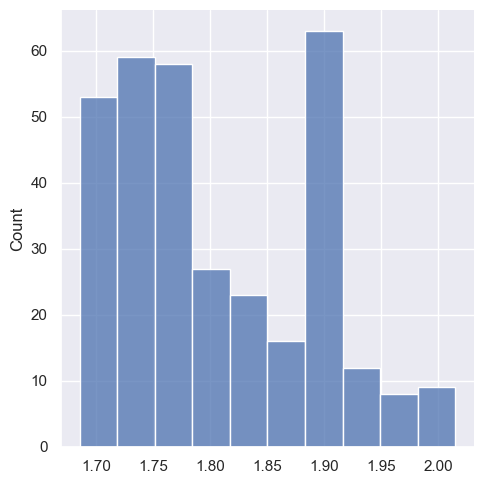

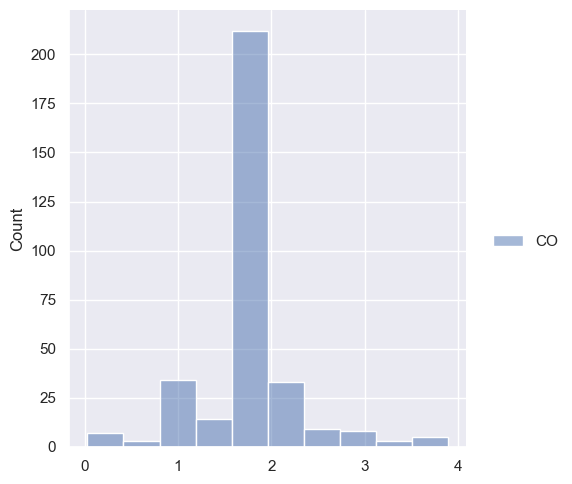

In [329]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_co)
sns.displot(data = y_test)

<Axes: ylabel='Density'>

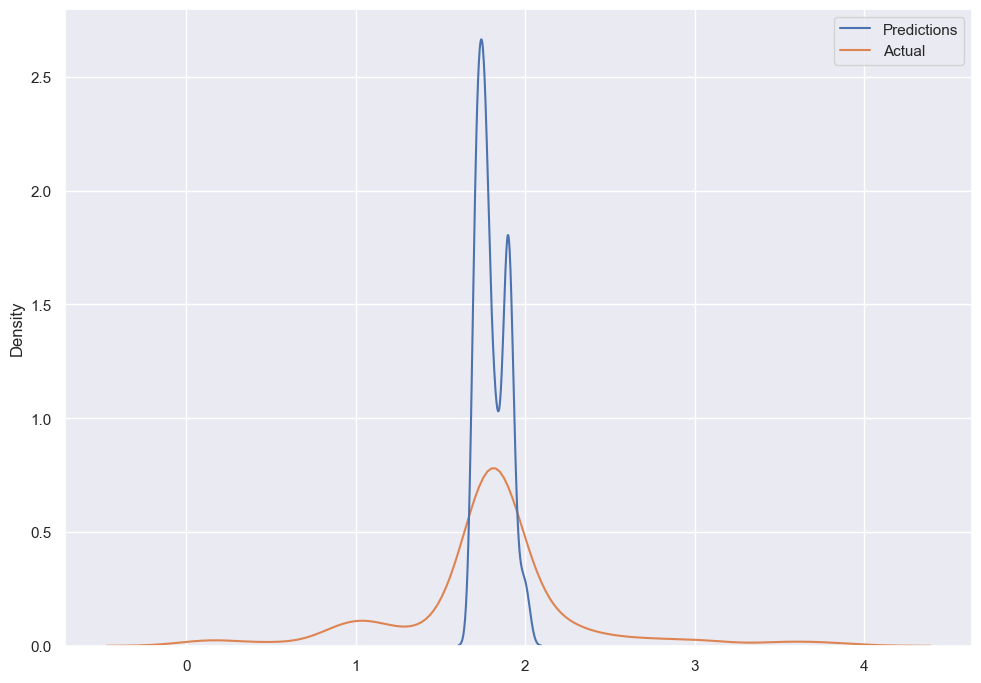

In [330]:
results = pd.DataFrame(predictions_co, columns = ['Predictions'])
results["Actual"] = list(y_test["CO"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Ozone

In [331]:
data_ozone = pd.DataFrame()
data_ozone["month"] = bandra["month"]
data_ozone["week"] = bandra["week"]
data_ozone["week_day"] = bandra["week_day"]
data_ozone["Ozone"] = bandra["Ozone"]
cols = data_ozone.columns
data_ozone.head()

,month,week,week_day,Ozone
0,5,22,4,32.15
1,6,22,5,24.38
2,6,22,6,24.95
3,6,23,0,24.88
4,6,23,1,24.76


In [332]:
# shuffling the data set
data_ozone = shuffle(data_ozone, random_state=1).reset_index(drop=True)
data_ozone.head()

,month,week,week_day,Ozone
0,10,41,4,29.16369
1,11,45,2,29.16369
2,9,38,3,11.12000
3,7,28,4,11.52000
4,7,30,2,11.48000


In [333]:
duplicate_ozone = data_ozone.copy()

In [334]:
#normalizing the dataset
data_ozone = preprocessing.normalize(data_ozone,norm='l2')
data_ozone = pd.DataFrame(data_ozone, columns=cols)

In [335]:
X_o3 = data_ozone.drop('Ozone', axis=1) #data basically refere to the values in the independent columns
y_o3 = data_ozone.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X_o3, y_o3, test_size=0.2, random_state=42)

In [337]:
bandra_ozone_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [338]:
predictions_ozone = bandra_ozone_svr.predict(X_test)

In [339]:
r2 = r2_score(y_test, predictions_ozone)
print('r2 score for   model is', r2)

r2 score for   model is 0.9416121940718082


In [340]:
predictions_ozone.shape

(328,)

In [341]:
#RSME - Root Mean Square Error
predictions5 = predictions_ozone.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

Ozone    0.066674
dtype: float64

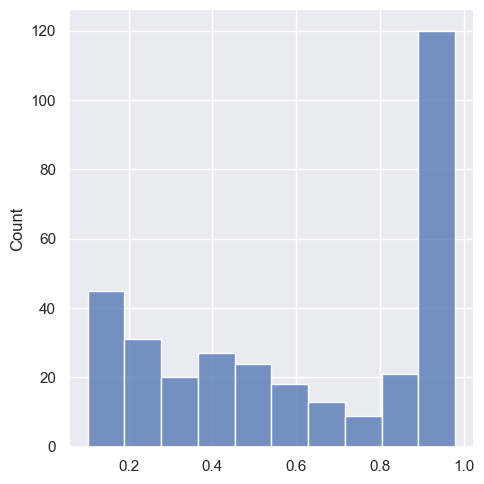

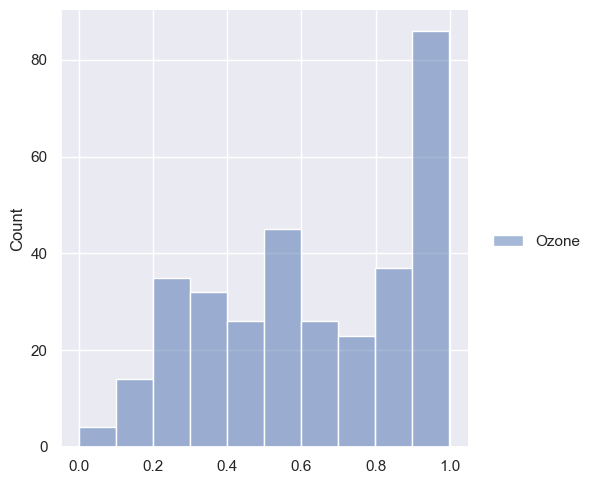

In [342]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_ozone)
sns.displot(data = y_test)

<Axes: ylabel='Density'>

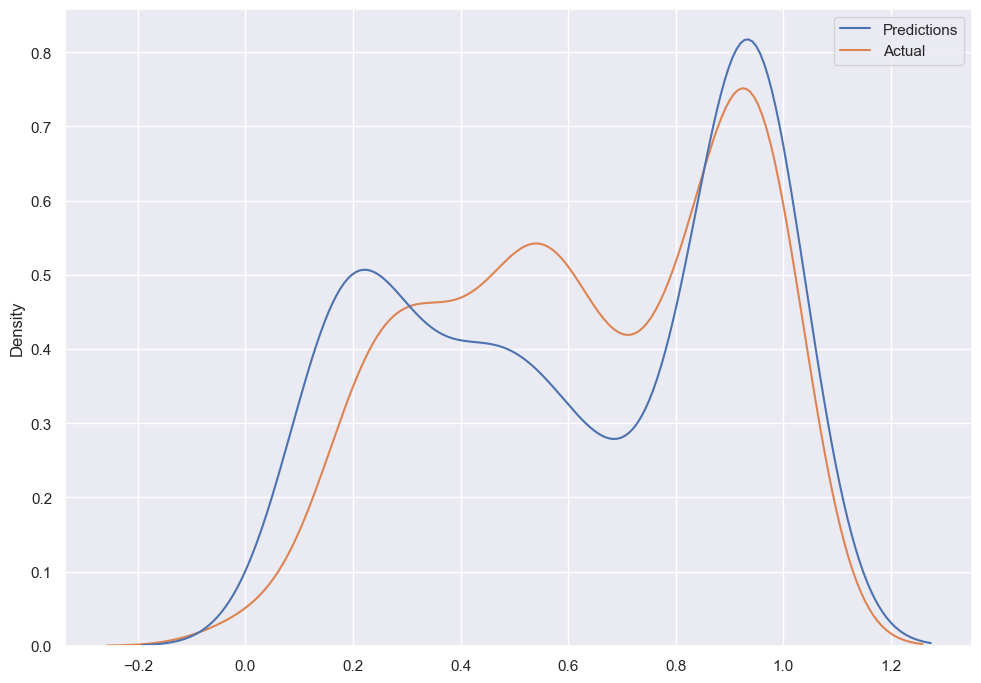

In [343]:
results = pd.DataFrame(predictions_ozone, columns = ['Predictions'])
results["Actual"] = list(y_test["Ozone"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Prediction Functions

In [344]:
##1. PM2.5 Sub-Index calculation
def PM25(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

##2. PM10 Sub-Index calculation
def PM10(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

##3. NO2 Sub-Index calculation
def NO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0



##4. SO2 Sub-Index calculation
def SO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

##5. CO Sub-Index calculation
def CO(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

##6. O3 Sub-Index calculation
def O3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

In [345]:
def aqi(l):
    final = max(PM25(l[0]),PM10(l[1]),NO2(l[2]),SO2(l[3]),CO(l[4]),O3(l[5]))
    if final >=0 and final<=50:
        return([round(final,2),"Good"])
    elif final>50 and final<=100:
        return([round(final,2),"Satisfactory"])
    elif final>100 and final<= 200:
        return([round(final,2),"Moderately Polluted"])
    elif final>200 and final<=300:
        return([round(final,2),"Poor"])
    elif final>300 and final<=400:
        return([round(final,2),"Very poor"])
    elif final>400:
        return([round(final,2),"Severe"])

In [346]:
def predictor_pm25(query, model_pm25,data_pm25,X):
    results = [] 
    location = data_pm25.loc[(data_pm25['month'] == query[0]) & (data_pm25['week'] == query[1]) & (data_pm25['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm25.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm25.loc[l]**2)))
    return(sum(results) / (len(results)-1))

def predictor_pm10(query, model_pm10,data_pm10,X):
    results = [] 
    location = data_pm10.loc[(data_pm10['month'] == query[0]) & (data_pm10['week'] == query[1]) & (data_pm10['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm10.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm10.loc[l]**2)))
    return(sum(results) / (len(results)-1))

def predictor_no2(query, model_no2, data_no2,X):
    results = []
    location = data_no2.loc[(data_no2['month'] == query[0]) & (data_no2['week'] == query[1]) & (data_no2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_no2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_no2.loc[l]**2)))
    return(sum(results) / (len(results)-1))

def predictor_so2(query, model_so2,data_so2,X):
    results = [] 
    location = data_so2.loc[(data_so2['month'] == query[0]) & (data_so2['week'] == query[1]) & (data_so2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_so2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_so2.loc[l]**2)))
    return(sum(results) / (len(results)-1))

def predictor_co(query, model_co,data_co,X):
    results = [] 
    location = data_co.loc[(data_co['month'] == query[0]) & (data_co['week'] == query[1]) & (data_co['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_co.predict(np.array(query).reshape(1,-1)))
    return(sum(results) / (len(results)-1))

def predictor_o3(query, model_o3,data_o3,X):
    results = []
    location = data_o3.loc[(data_o3['month'] == query[0]) & (data_o3['week'] == query[1]) & (data_o3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_o3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_o3.loc[l]**2)))
    return(sum(results) / (len(results)-1))

In [347]:
def precal(date, model_pm25,model_pm10,model_no2,model_so2,model_co,model_o3,data_pm25,data_pm10,data_no2,data_so2,data_co,data_o3,X_pm25,X_pm10,X_no2,X_so2,X_co,X_o3):
    query = []
    result = []
    date = pd.DataFrame(date)
    date[0] = pd.to_datetime(date[0],format="%Y-%m-%d")
    query.append(list(date[0].dt.month)[0])
    query.append(list(date[0].dt.strftime('%V').astype('int64'))[0])
    query.append(list(date[0].dt.weekday)[0])
    result.append(predictor_pm25(query,model_pm25, data_pm25,X_pm25))
    result.append(predictor_pm10(query,model_pm10, data_pm10,X_pm10))
    result.append(predictor_no2(query,model_no2, data_no2,X_no2))
    result.append(predictor_so2(query,model_so2, data_so2,X_so2))
    result.append(predictor_co(query,model_co, data_co,X_co))
    result.append(predictor_o3(query,model_o3, data_o3,X_o3))
    ans = aqi(result)
    print("Expected:-\nPM 2.5: " + str(result[0])+"\nPM 10: " + str(result[1])+"\nNO2: "  + str(result[2])+"\nSO2: " + str(result[3])+"\nCO: " + str(result[4])+"\nO3: " + str(result[5]))
    print("\nThe AQI value is expected to be around " + str(ans[0]) + " and the index is expected to be " + ans[1])
    

In [348]:
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category
warnings.filterwarnings(action='ignore', category=UserWarning) # setting ignore as a parameter and further adding category
precal(["2019-08-30"],bandra_pm25_svr,bandra_pm10_model_svr,bandra_no2_svr,bandra_so2_svr,bandra_co_svr,bandra_ozone_svr,duplicate_pm25,duplicate_pm10,duplicate_no2,duplicate_so2,duplicate_co,duplicate_ozone,X_pm25,X_pm10,X_no2,X_so2,X_co,X_o3)

Expected:-
PM 2.5: [12.47440071]
PM 10: [87.01874591]
NO2: [11.35948668]
SO2: [21.53611964]
CO: [0.83984016]
O3: [12.5868658]

The AQI value is expected to be around 87.02 and the index is expected to be Satisfactory


C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_18196\1088501672.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(x)
C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_18196\1088501672.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(x)
C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_18196\1088501672.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(x)
C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_18196\1088501672.py:70: DeprecationWa